## Exercise 3 (Normalisation)

In [118]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [119]:
df = pd.read_csv('rice.csv')
print(df)

       AREA   PERIMETER   MAJORAXIS  MINORAXIS  ECCENTRICITY  CONVEX_AREA  \
0     15231  525.578979  229.749878  85.093788      0.928882        15617   
1     14656  494.311005  206.020065  91.730972      0.895405        15072   
2     14634  501.122009  214.106781  87.768288      0.912118        14954   
3     13176  458.342987  193.337387  87.448395      0.891861        13368   
4     14688  507.166992  211.743378  89.312454      0.906691        15262   
...     ...         ...         ...        ...           ...          ...   
3805  11441  415.858002  170.486771  85.756592      0.864280        11628   
3806  11625  421.390015  167.714798  89.462570      0.845850        11904   
3807  12437  442.498993  183.572922  86.801979      0.881144        12645   
3808   9882  392.296997  161.193985  78.210480      0.874406        10097   
3809  11434  404.709991  161.079269  90.868195      0.825692        11591   

        EXTENT     CLASS  
0     0.572896    Cammeo  
1     0.615436    Cam

In [120]:
from sklearn import preprocessing
from sklearn import pipeline

Question 1 Adapt the code of the previous exercise to find the best k for the k-nn algorithm
used with normalisation and to evaluate is future performances (on the rice data set).

In [121]:
import math
opt = round(math.sqrt(len(df)))
print(opt)

62


In [122]:
pipe = pipeline.make_pipeline(preprocessing.StandardScaler(),neighbors.KNeighborsClassifier(62))

In [123]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)

In the next few cells, I calculate the error rate for every possible value of k that we can have in the rice dataset and then find the minimum rate. Plotting the rates graphically allows me to check which value of k gives me the lowest error rate with my entire normalised data set.

In [125]:
error_rate=[]
for i in range (1,opt):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.1294838145231846,
 0.1373578302712161,
 0.09973753280839895,
 0.10761154855643044,
 0.10673665791776028,
 0.10936132983377078,
 0.11461067366579178,
 0.11198600174978128,
 0.11461067366579178,
 0.11986001749781278,
 0.11723534558180228,
 0.11986001749781278,
 0.11461067366579178,
 0.11723534558180228,
 0.11548556430446194,
 0.1163604549431321,
 0.11286089238845144,
 0.11548556430446194,
 0.11548556430446194,
 0.1137357830271216,
 0.1216097987751531,
 0.12335958005249344,
 0.1216097987751531,
 0.11461067366579178,
 0.11811023622047244,
 0.11723534558180228,
 0.11548556430446194,
 0.11548556430446194,
 0.1163604549431321,
 0.11461067366579178,
 0.1137357830271216,
 0.11461067366579178,
 0.11811023622047244,
 0.1189851268591426,
 0.11986001749781278,
 0.11461067366579178,
 0.1163604549431321,
 0.11548556430446194,
 0.1163604549431321,
 0.1137357830271216,
 0.11023622047244094,
 0.10936132983377078,
 0.1084864391951006,
 0.10936132983377078,
 0.1111111111111111,
 0.1111111111111111,
 0.

In [126]:
print(min(error_rate))

0.09973753280839895


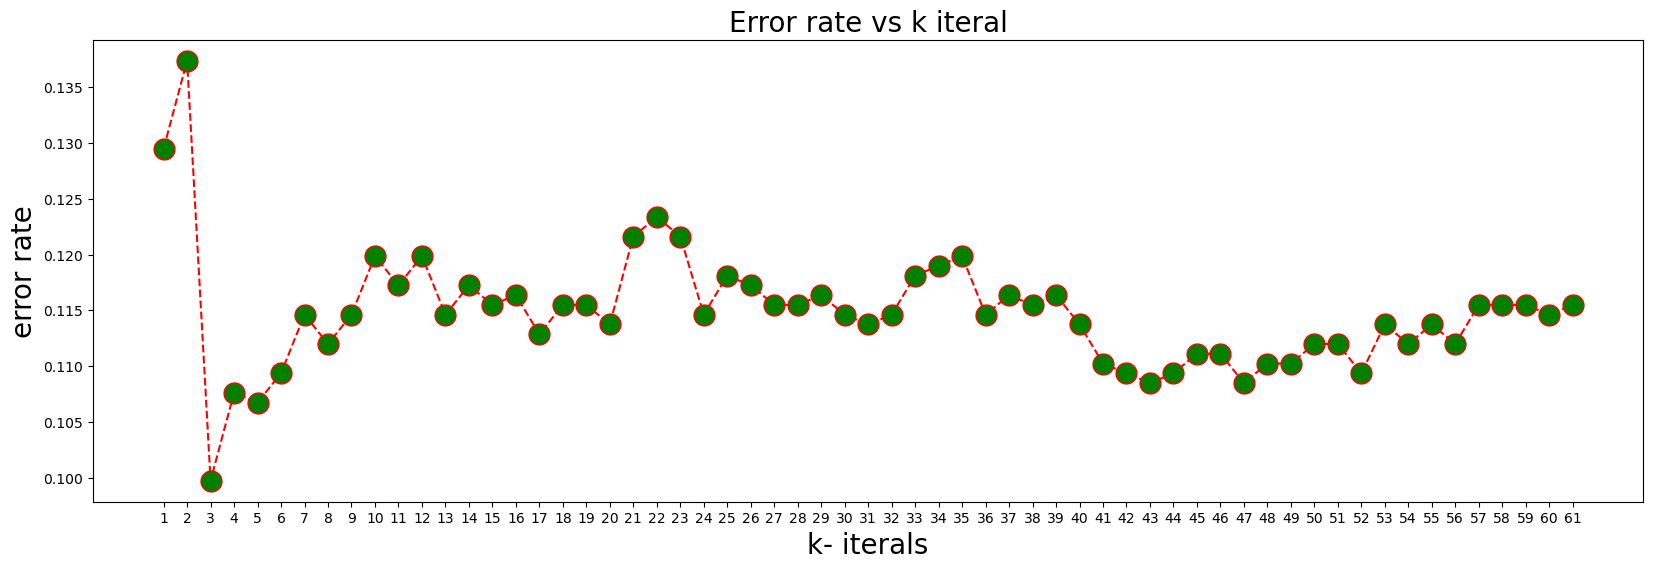

In [127]:
#plotting the error rate vs k graph 
plt.figure(figsize=(20,6))
plt.plot(range(1,opt),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k iteral",fontsize=20)
plt.xlabel("k- iterals",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,opt))
plt.show()

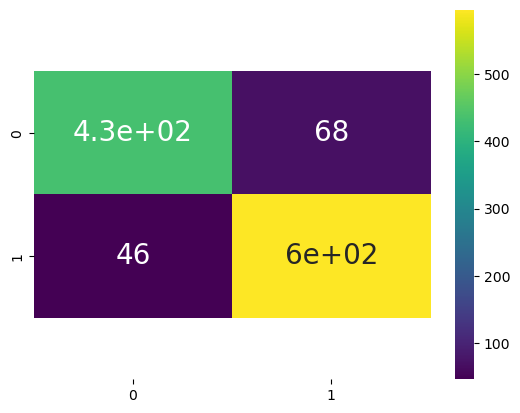

In [129]:
#from the graph, we can see that the minimum error corresponds to k = 3.
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
con=confusion_matrix(y_test,pred)
ax=sns.heatmap(con,annot=True,cmap="viridis",annot_kws={"size":20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Again, in the same method as used in exercise 2, we find that the best value of k that can predict the normalised model well is at k = 3. We can conclude this from the finding that k = 3 has the lowest error rate.

Question 2 Adapt the code to select the best overall solution between k-nn with or without
normalisation.

In exercise 2, we found the best value of k with the highest accuracy at k = 13. In question 1 of exercise 3, we found the best value of k with normalisation at k = 3 with least errors. We can now calculate the accuracy of k = 3 for the normalised data and compare it with that of k = 13 for the standardised data.

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42, stratify=y)
accuracies3 = []

for i in range(1, opt):
    if(i%2!=0):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        y_true=y_test
        accuracy = accuracy_score(y_test, y_pred)
        accuracies3.append(accuracy)

print(accuracies3)

[0.868766404199475, 0.8757655293088364, 0.8696412948381452, 0.8705161854768154, 0.8722659667541557, 0.8705161854768154, 0.8766404199475065, 0.8731408573928259, 0.8722659667541557, 0.8713910761154856, 0.8696412948381452, 0.8705161854768154, 0.8670166229221348, 0.8713910761154856, 0.8740157480314961, 0.8731408573928259, 0.8731408573928259, 0.8740157480314961, 0.8722659667541557, 0.8731408573928259, 0.8722659667541557, 0.8757655293088364, 0.8731408573928259, 0.8722659667541557, 0.8696412948381452, 0.8696412948381452, 0.8722659667541557, 0.8713910761154856, 0.8713910761154856, 0.8722659667541557, 0.8748906386701663]


In [140]:
print(max(accuracies3))

0.8766404199475065


The maximum accuracy corresponds to k = 13 also for the normalised model, and hence we can conclude that the best value of k = 13 for the normalised or standardised data.